In [2]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [3]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), 
                             input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#2nd layer
#classifier.add(Conv2D(64, 3, 3))
#classifier.add(LeakyReLU(alpha=0.1))
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3rd layer
#classifier.add(Conv2D(128, 3, 3))
#classifier.add(LeakyReLU(alpha=0.1))
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(units = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(units = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

W0725 01:11:33.299925 52824 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  
W0725 01:11:33.510185 52824 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 01:11:33.553253 52824 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 01:11:33.583214 52824 deprecation_wrapper.py:119] 

In [6]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/new_train_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/new_test_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 145 images belonging to 26 classes.
Found 53 images belonging to 26 classes.


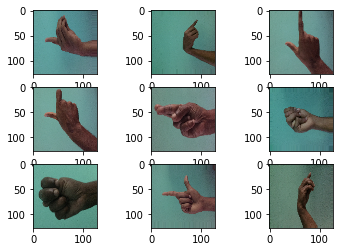

In [7]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [8]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 20)

W0725 01:13:46.804144 52824 deprecation.py:323] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 01:13:46.849023 52824 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
200/200 [==============================] - 403s 2s/step - loss: 1.5072 - acc: 0.7931 - val_loss: 0.6328 - val_acc: 0.8679
Epoch 2/10
200/200 [==============================] - 406s 2s/step - loss: 0.0096 - acc: 0.9989 - val_loss: 0.6059 - val_acc: 0.8774
Epoch 3/10
200/200 [==============================] - 412s 2s/step - loss: 0.0140 - acc: 0.9970 - val_loss: 0.6058 - val_acc: 0.8698
Epoch 4/10
200/200 [==============================] - 406s 2s/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6110 - val_acc: 0.8925
Epoch 5/10
200/200 [==============================] - 405s 2s/step - loss: 5.2962e-04 - acc: 1.0000 - val_loss: 0.4986 - val_acc: 0.8943
Epoch 6/10
200/200 [==============================] - 404s 2s/step - loss: 3.0458e-04 - acc: 1.0000 - val_loss: 0.6119 - val_acc: 0.8943
Epoch 7/10
200/200 [==============================] - 400s 2s/step - loss: 2.5151e-04 - acc: 1.0000 - val_loss: 0.5976 - val_acc: 0.9000
Epoch 8/10
200/200 [==============================] - 388

In [9]:
# save model and architecture to single file
classifier.save("model.hNew26_04")
print("Saved model to disk")

Saved model to disk


In [10]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image

from IPython.display import display
from PIL import Image

import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt

# load model
classifier = load_model('model.hNew26_04')

[25]


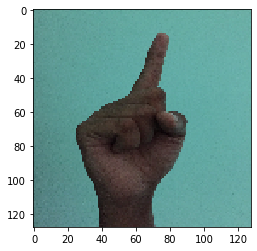

In [46]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/random/IMG_5524.jpg', target_size = (128, 128))

#test_image = test_image.rotate(-90)
#plt.imshow(test_image)

display_image = test_image.rotate(-90)
plt.imshow(display_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

#training_set.class_indices

Sign 9


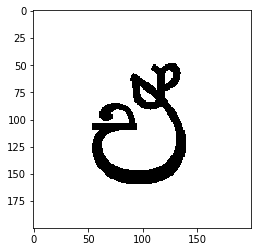

In [47]:
if result == 0:
    prediction = 'Sign 1'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter a.png')
elif result == 1:
    prediction = 'Sign 10'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter K.png')
elif result == 2:
    prediction = 'Sign 11'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter G.png')
elif result == 3:
    prediction = 'Sign 12'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter T.png')
elif result == 4:
    prediction = 'Sign 13'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter dh.png')
elif result == 5:
    prediction = 'Sign 14'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter th.png')
elif result == 6:
    prediction = 'Sign 15'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter D.png')
elif result == 7:
    prediction = 'Sign 16'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter N.png')
elif result == 8:
    prediction = 'Sign 17'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter P.png')
elif result == 9:
    prediction = 'Sign 18'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter B.png')
elif result == 10:
    prediction = 'Sign 19'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter M.png')
elif result == 11:
    prediction = 'Sign 2'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter aa.png')
elif result == 12:
    prediction = 'Sign 20'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter Y.png')
elif result == 13:
    prediction = 'Sign 21'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter R.png')
elif result == 14:
    prediction = 'Sign 22'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter L.png')
elif result == 15:
    prediction = 'Sign 23'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter V.png')
elif result == 16:
    prediction = 'Sign 24'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter S.png')
elif result == 17:
    prediction = 'Sign 25'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter H.png')
elif result == 18:
    prediction = 'Sign 26'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ch.png')
elif result == 19:
    prediction = 'Sign 3'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ae.png')
elif result == 20:
    prediction = 'Sign 4'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter i.png')
elif result == 21:
    prediction = 'Sign 5'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ii.png')
elif result == 22:
    prediction = 'Sign 6'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter u.png')
elif result == 23:
    prediction = 'Sign 7'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter uu.png')
elif result == 24:
    prediction = 'Sign 8'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter e.png')
elif result == 25:
    prediction = 'Sign 9'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ee.png')
    
print(prediction)
plt.imshow(Result_Image)